#### 3-1) Linear_classification.txt 파일을 파일 입출력 객체를 활용하여 읽고 각각 list 에 데이터에 저장하시오.

In [2]:
f = open("linear_classfication.txt", 'r') # linear_regression.txt 파일을 읽기 전용으로 open
lines = f.readlines() # 모든 라인의 데이터를 load

for line in lines:
    line_data = line.split(' ') # split 명령어 안에 있는 string 데이터로 데이터를 나누어 리스트형태로 변환하는 함수
                        # (‘ ’)은 공백을 기준으로 데이터를 나눔

    line_data[3] = line_data[3].replace('\n','') # \n 제거
    
    if line_data[3] == '1': # label이 1이면
        label_result = "실험 성공" # 성공
    elif line_data[3] == '-1': # label이 -1이면
        label_result = "실험 실패" # 실패 출력

    print(line_data[0] + ", ", end='') # 인덱스 출력
    print("용액S " + line_data[1] + "ml, ", end='') # 용액S 용량 출력
    print("용액T " + line_data[2] + "ml, ", end='') # 용액T 용량 출력
    print(label_result) #라벨 결과 출력
    
f.close()

A, 용액S 35ml, 용액T 27ml, 실험 성공
B, 용액S 81ml, 용액T 8ml, 실험 실패
C, 용액S 16ml, 용액T 38ml, 실험 성공
D, 용액S 28ml, 용액T 42ml, 실험 성공
E, 용액S 72ml, 용액T 20ml, 실험 실패
F, 용액S 64ml, 용액T 43ml, 실험 실패
G, 용액S 29ml, 용액T 13ml, 실험 성공
H, 용액S 41ml, 용액T 22ml, 실험 실패
I, 용액S 32ml, 용액T 51ml, 실험 실패
J, 용액S 15ml, 용액T 36ml, 실험 성공


#### 3-2) 최소제곱법(Least square method)를 이용하여, 문제 3-1)에서 읽은 데이터에 대한 linear classification(선형분류 모델 학습)을 수행하라

In [3]:
import sympy as sym # 참고 1 참조!!!

# 데이터 읽기
f = open("linear_classfication.txt", 'r') # linear_regression.txt 파일을 읽기 전용으로 open
lines = f.readlines() # 모든 라인의 데이터를 load

# 데이터 가공
X = [] # 독립변수
y = [] # 종속변수
for line in lines:
    line_data = line.split(' ') # split 명령어 안에 있는 string 데이터로 데이터를 나누어 리스트형태로 변환하는 함수
                        # (‘ ’)은 공백을 기준으로 데이터를 나눔
    x1 = float(line_data[1]) # 용액S 용량
    x2 = float(line_data[2]) # 용액T 용량
    X.append([x1, x2]) # X리스트에 추가
    line_data[3] = line_data[3].replace('\n','') # \n 제거
    y.append(float(line_data[3])) # y리스트에 추가

# 상수항 추가
X = sym.Matrix([[1, x[0], x[1]] for x in X])
y = sym.Matrix(y)

# 계수 추정
c = X.T * X
c_inv = c.inv()
beta = c_inv * X.T * y # beta값 얻기

# 파라미터 출력
print("파라미터 a :", beta[1]) # a값
print("파라미터 b :", beta[2]) # b값
print("파라미터 c :", beta[0]) # c값

f.close()

파라미터 a : -0.0417926603993364
파라미터 b : -0.0251421915261616
파라미터 c : 2.48030262027744


In [4]:
import numpy as np # 참고 2 참조 !!!

# 데이터 읽기
f = open("linear_classfication.txt", 'r') # linear_regression.txt 파일을 읽기 전용으로 open
lines = f.readlines() # 모든 라인의 데이터를 load

# 데이터 가공
X = [] # 독립변수
y = [] # 종속변수
for line in lines:
    line_data = line.split(' ') # split 명령어 안에 있는 string 데이터로 데이터를 나누어 리스트형태로 변환하는 함수
                        # (‘ ’)은 공백을 기준으로 데이터를 나눔
    x1 = float(line_data[1]) # 용액S 용량
    x2 = float(line_data[2]) # 용액T 용량
    X.append([x1, x2]) # X리스트에 추가
    line_data[3] = line_data[3].replace('\n','') # \n 제거
    y.append(float(line_data[3])) # y리스트에 추가

# 상수항 추가
X = np.array([[1, x[0], x[1]] for x in X])
y = np.array(y)

# 계수 추정
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# 파라미터 출력
print("파라미터 a :", beta[1]) # a값
print("파라미터 b :", beta[2]) # b값
print("파라미터 c :", beta[0]) # c값

파라미터 a : -0.04179266039933635
파라미터 b : -0.02514219152616152
파라미터 c : 2.4803026202774365


#### 3-3) 구해진 선형 모델 및 학습 데이터를 matplotlib 를 이용하여 시각화하시오.

<IPython.core.display.Javascript object>


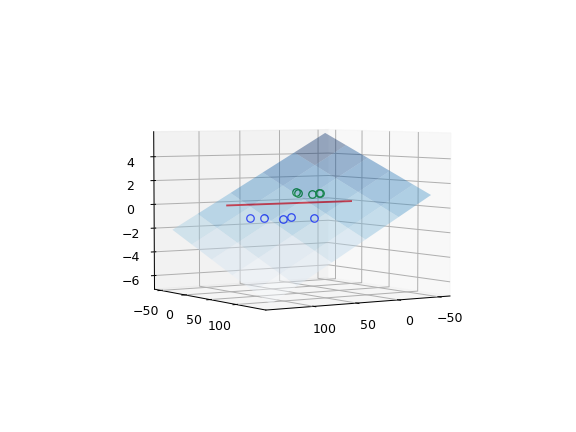

In [20]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # projection을 3d로 설정!


# 학습 데이터 직접 집어넣음!
x1 = [35, 16, 28, 29, 15]
y1 = [27, 38, 42, 13, 36]
z1 = [1, 1, 1, 1, 1]

x_1 = [81, 72, 64, 41, 32]
y_1 = [8, 20, 43, 22, 51]
z_1 = [-1, -1, -1, -1, -1]

# 선형 모델 값 저장
a = -0.04179266039933635 # beta[1]
b = -0.02514219152616152 # beta[2]
c = 2.4803026202774365 # beta[0]


# 범위 제한
X = np.arange(-0.5, 1.5, 0.1)*100
Y = np.arange(-0.5, 1.5, 0.1)*100
X, Y = np.meshgrid(X, Y)

# Z = (float(a) * X) + (float(b) * Y) + float(c) # 교재 경사하강법
Z = (float(a) * X) + (float(b) * Y) + float(c) 

# 학습 데이터 출력 (1값은 초록색, -1값은 파란색으로 출력)
ax.plot(x1, y1, z1, linestyle="none", marker="o", mfc="none", markeredgecolor="g") #샘플 출력
ax.plot(x_1, y_1, z_1, linestyle="none", marker="o", mfc="none", markeredgecolor="b") #샘플 출력


ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.Blues) # 평면 출력
ax.plot([-50, 100], [-50*a-c, 100*a-c], [0,0],'r-') # 선 출력

plt.show() # 그래프 보여주기

#### 3-4) 학습된 선형 분류 모델에 의해 용액 S 47ml, 용액 T 29ml 인 실험은 성공인가? 실패인가? (코드로 작성) 

In [3]:
x1_sample = 47 # 용액 S 47ml
y1_sample = 29 # 용액 T 29ml
y_estimate_sample = (float(a) * x1_sample) + (float(b) * y1_sample) + float(c) # 선형 회귀 모델에 대입

if y_estimate_sample > 0: # 모델로 예측된 값이 0 보다 클 경우 실험 성공
    result = "성공"
elif y_estimate_sample < 0: # 0 보다 작을 경우 실험 실패로 판단
    result = "실패"

print("학습된 선형 분류 모델에 의해 용액 S 47ml, 용액 T 29ml 인 실험은", result, "입니다. ") # 예측값 출력

학습된 선형 분류 모델에 의해 용액 S 47ml, 용액 T 29ml 인 실험은 실패 입니다. 
